i:0,Loss:6.737190,w:0.653288,b:0.058391
i:50,Loss:5.673965,w:0.828760,b:-0.269752
i:100,Loss:5.476363,w:0.860183,b:-0.582539
i:150,Loss:5.311381,w:0.888895,b:-0.868345
i:200,Loss:5.173635,w:0.915130,b:-1.129497
i:250,Loss:5.058628,w:0.939103,b:-1.368122
i:300,Loss:4.962606,w:0.961007,b:-1.586162
i:350,Loss:4.882437,w:0.981022,b:-1.785394
i:400,Loss:4.815501,w:0.999311,b:-1.967439
i:450,Loss:4.759616,w:1.016022,b:-2.133782
i:500,Loss:4.712956,w:1.031291,b:-2.285775
i:550,Loss:4.673999,w:1.045243,b:-2.424657
i:600,Loss:4.641474,w:1.057992,b:-2.551558
i:650,Loss:4.614317,w:1.069641,b:-2.667513
i:700,Loss:4.591644,w:1.080285,b:-2.773466
i:750,Loss:4.572713,w:1.090011,b:-2.870279
i:800,Loss:4.556908,w:1.098898,b:-2.958740
i:850,Loss:4.543712,w:1.107018,b:-3.039571
i:900,Loss:4.532694,w:1.114438,b:-3.113429
i:950,Loss:4.523495,w:1.121218,b:-3.180916
i:1000,Loss:4.515815,w:1.127413,b:-3.242582
i:1050,Loss:4.509403,w:1.133073,b:-3.298928
i:1100,Loss:4.504049,w:1.138246,b:-3.350413
i:1150,Loss:

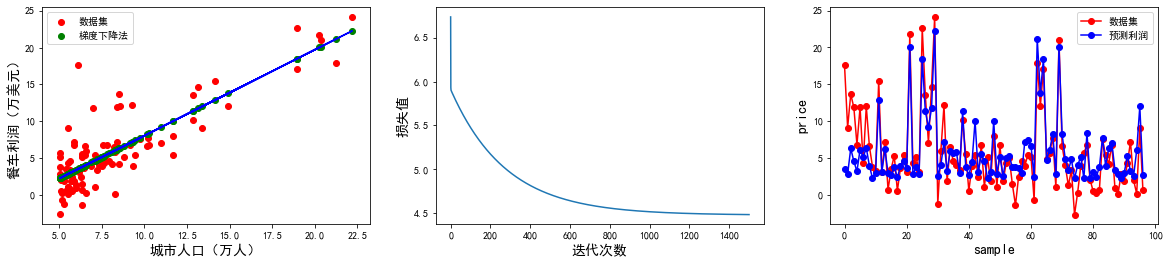

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
#设置字体
plt.rcParams['font.sans-serif'] =['SimHei']


def LoadFile(filename):
    data = np.loadtxt(filename, delimiter=',', unpack=True, usecols=(0, 1))
    x = np.transpose(np.array(data[0]))
    y = np.transpose(np.array(data[1]))
    return x, y

#加载样本数据

if __name__ == '__main__':
    x, y = LoadFile('ex1data1.txt')
    learn_rate=0.01  #设置超参数,学习率
    iter=1500    #迭代次数
    display_step=50  #每50次迭代显示一下效果
    
    #初始化为0
    w=0
    b=0
    
    #训练模型
    mse=[] #存放每次迭代的损失值
    for i in range(0,iter+1):
        #求偏导
        dL_dw=np.mean(x*(w*x+b-y))
        dL_db=np.mean(w*x+b-y)
        #更新模型参数
        w=w-learn_rate*dL_dw
        b=b-learn_rate*dL_db
        #得到估计值
        pred=w*x+b
        #计算损失(均方误差)
        Loss=np.mean(np.square(y-pred))/2
        mse.append(Loss)
        if i%display_step==0:
            print("i:%i,Loss:%f,w:%f,b:%f"%(i,mse[i],w,b))
            
            
    print("城市人口为35000时的预测餐车利润:%f"%(3.5*w+b))
    print("城市人口为70000时的预测餐车利润:%f"%(7*w+b))
    #模型和数据可视化
    plt.figure(figsize=(20,4))
    plt.subplot(1,3,1)
    #绘制散点图
    #张量和数组都可以作为散点函数的输入提供点坐标
    plt.scatter(x,y,color="red",label="数据集")
    plt.scatter(x,pred,color="green",label="梯度下降法")
    plt.plot(x,pred,color="blue")

    #设置坐标轴的标签文字和字号
    plt.xlabel("城市人口（万人）",fontsize=14)
    plt.ylabel("餐车利润（万美元）",fontsize=14)

    #在左上方显示图例
    plt.legend(loc="upper left")

    #损失变化可视化
    plt.subplot(1,3,2)
    plt.plot(mse)
    plt.xlabel("迭代次数",fontsize=14)
    plt.ylabel("损失值",fontsize=14)
    #估计值与标签值比较可视化
    plt.subplot(1,3,3)
    plt.plot(y,color="red",marker="o",label="数据集")
    plt.plot(pred,color="blue",marker="o",label="预测利润")
    plt.legend()
    plt.xlabel("sample",fontsize=14)
    plt.ylabel("price",fontsize=14)
    #显示整个绘图
    plt.show()



i:0,Loss:60243485516.962494
i:50,Loss:6766097390.159694
i:100,Loss:5382571239.527689
i:150,Loss:4658040560.158987
i:200,Loss:4114069824.121022
i:250,Loss:3701697312.108251
i:300,Loss:3387218513.321174
i:350,Loss:3145736449.576025
i:400,Loss:2958832363.462618
i:450,Loss:2812867934.514849
i:500,Loss:2697733527.919854
i:550,Loss:2605925102.784432
i:600,Loss:2531863415.169103
i:650,Loss:2471391852.543878
i:700,Loss:2421405969.187702
i:750,Loss:2379580126.538430
i:800,Loss:2344165734.796679
i:850,Loss:2313842294.452954
i:900,Loss:2287607377.069402
i:950,Loss:2264695326.691985
i:1000,Loss:2244517148.051528
i:1050,Loss:2226616026.858234
i:1100,Loss:2210634386.485046
i:1150,Loss:2196289460.895329
i:1200,Loss:2183355156.584526
i:1250,Loss:2171648560.865690
i:1300,Loss:2161019884.798658
i:1350,Loss:2151344946.810517
i:1400,Loss:2142519537.338157
i:1450,Loss:2134455177.577557
i:1500,Loss:2127075912.818542
房屋面积为1650平方英尺房间数量为3时预测房屋的价格:295986.089862


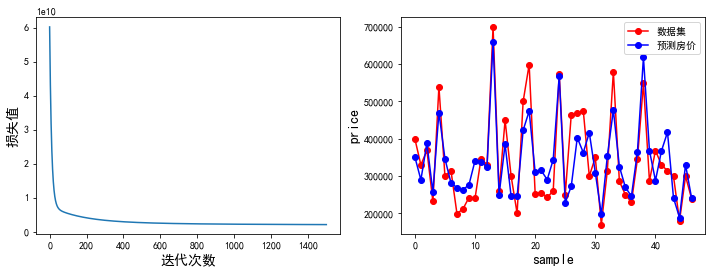

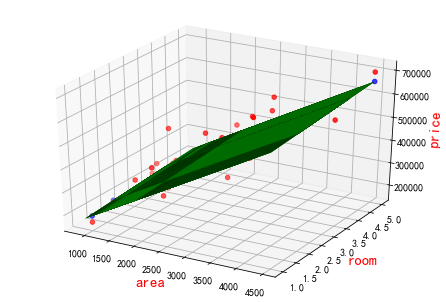

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

def LoadFile(filename):
    data = np.loadtxt(filename, delimiter=',', unpack=True, usecols=(0, 1, 2))
    x = np.transpose(np.array(data[0]))
    y = np.transpose(np.array(data[1]))
    z = np.transpose(np.array(data[2]))
    return x, y, z

if __name__ == '__main__':
    area, room, price = LoadFile('ex1data2.txt')
    num=len(area) #样本数量
    x0=np.ones(num)
    #归一化处理，这里使用线性归一化
    x1=(area-np.average(area))/(area.max()-area.min())
    x2=(room-np.average(room))/(room.max()-room.min())
    #堆叠属性数组，构造属性矩阵
    #从(16,)到(16,3),因为新出现的轴是第二个轴所以axis为1
    X=np.stack((x0,x1,x2),axis=1)
    #print(X)
    #得到形状为一列的数组
    Y=price.reshape(-1,1)
    #print(Y)
    learn_rate=0.001    #设置超参数
    iter=1500   #迭代次数
    display_step=50    #每50次迭代显示一下效果
    
    #设置模型参数初始值
    W=[[0],
       [0],
       [0]]
    #训练模型
    mse=[]
    for i in range(0,iter+1):
        #求偏导
        dL_dW=np.matmul(np.transpose(X),np.matmul(X,W)-Y)   #XT(XW-Y)
        #更新模型参数
        W=W-learn_rate*dL_dW
        #得到估计值
        PRED=np.matmul(X,W)
        #计算损失(均方误差)
        Loss=np.mean(np.square(Y-PRED))/2
        mse.append(Loss)
        if i % display_step==0:
            print("i:%i,Loss:%f"%(i,mse[i]))
    xx0=np.ones(1)
    xx1=(1650.0-np.average(area))/(area.max()-area.min())
    xx2=(3.0-np.average(room))/(room.max()-room.min())
    XX=[xx0,xx1,xx2]
    print("房屋面积为1650平方英尺房间数量为3时预测房屋的价格:%f"%(np.matmul(XX,W)))   
    
    #结果可视化
    plt.rcParams['font.sans-serif'] =['SimHei']
    plt.figure(figsize=(12,4))
    #损失变化可视化
    plt.subplot(1,2,1)
    plt.plot(mse)
    plt.xlabel("迭代次数",fontsize=14)
    plt.ylabel("损失值",fontsize=14)
    #估计值与标签值比较可视化
    plt.subplot(1,2,2)
    PRED=PRED.reshape(-1)
    plt.plot(price,color="red",marker="o",label="数据集")
    plt.plot(PRED,color="blue",marker="o",label="预测房价")
    plt.xlabel("sample",fontsize=14)
    plt.ylabel("price",fontsize=14)
    plt.legend()
    plt.show()
    
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(area, room, price, color="red")
    ax.set_zlabel('price', fontdict={'size': 15, 'color': 'red'})
    ax.set_ylabel('room', fontdict={'size': 15, 'color': 'red'})
    ax.set_xlabel('area', fontdict={'size': 15, 'color': 'red'})
    ax.scatter(area, room, PRED,color="b")
    XX, YY = np.meshgrid(area, room)
    ax.plot_surface(XX,
                    YY,
                    Z=W[:,0][0]*x0+W[:,0][1]*((XX-np.average(area))/(area.max()-area.min()))
                       +W[:,0][2]*((YY-np.average(room))/(room.max()-room.min())),
                    color='g',
                    alpha=0.9
                   )
   
    plt.show()
 
    
    